**Problems for Quantum Materials Chemistry – Due Friday, March 13th at 4:00 pm**
A 1-time 10 point deduction will be made for problem sets submitted after 4:00 pm on Friday, March 8th.  

Each question is worth 20 points.

You are expected to adhere to the collaboration policy described in the syllabus.  As such, if you discuss strategies for solving problems with other students, you must declare this in the problem set solution you submit.  Sharing solutions with other students does not constitute acceptable collaboration, even if declared, and will be treated as academic dishonesty.


In [1]:
#Global inputs for Problem set 1
import numpy as np
pi = np.pi 
from matplotlib import pyplot as plt
import scipy as sp


1.  Consider an electron in a 1-D box of length $L=1$ nm that has energy eigenstates given by 
\begin{equation}
\psi_n(x) = \sqrt{2} {\rm sin}(n \pi x)
\end{equation}
when $x$ has units of nanometers.  Now consider that an atomically-precise hammer is used to deform the bottom of the box such that the electron feels an effective potential given by 
\begin{equation}
V(x) = V(x)= -2(x-0.5)^3+0.5.
\end{equation}

    a.  Compute the energy exxpectation value of an electron described by $\psi_1(x)$ after the box is deformed.

    b.  Explain if you think the original energy eigenstates, $\psi_n(x)$, are stationary 
states in the deformed box.  

-2059.1058583350327
Energy expectation value is -2059.1058583350327


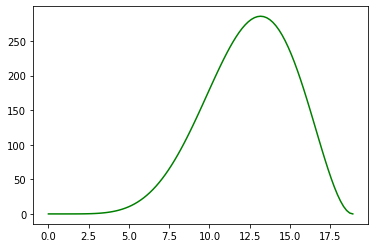

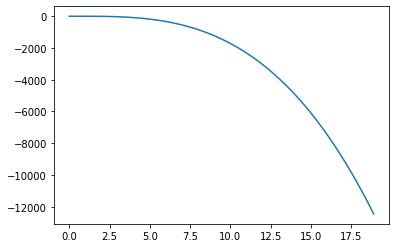

In [31]:
# Code For Question 1

#Global Variables
L = 18.897261339213 
n = 1
x = np.linspace(0,L,100)

def psi_x(n,x,L):
    p = np.sqrt(2/L)*np.sin((n*np.pi*x)/L)
    return p

#plt.plot(x, psi_x(n,x,L))
#plt.title("PIB Ground State Eigen Function")
#plt.xlabel("Length (nm)")
#plt.ylabel('Energy (Atomic Units)')
#plt.show()
V_x = -2*(x-1/2)**3+1/2
H_on_psi_x = (np.pi**2)/(L**2)*(1)*psi_x(n,x,L)+V_x*psi_x(n,x,L)
psi_star = np.conj(psi_x(n,x,L))

E_num = np.trapz((psi_star * H_on_psi_x),x)
E_den = np.trapz(psi_star**2,x)
E_val = E_num/E_den
print(E_num)
print('Energy expectation value is',E_val)
#plt.plot(x,V_x)
plt.plot(x,psi_star*(-1)*H_on_psi_x, 'green')
plt.show()

plt.plot(x,V_x)
plt.show()






Question 1
    a.  Compute the energy exxpectation value of an electron described by $\psi_1(x)$ after the box is deformed.
    b.  Explain if you think the original energy eigenstates, $\psi_n(x)$, are stationary 
states in the deformed box.

a.)Energy expectation value is -9158.861665137427
    
b.) No the origional energy eigenstates for the deformed box are not stationary states because the expectation value is not equal to 1. 

2.  Considering the modified box in Question 1, write down the Hamiltonian operator after the box has been modified.  Using this Hamiltonian, use the linear variational method and a bsis of the first 3 energy eigenstates of the ordinary particle in a box to estimate the ground state energy of the modified system.

\begin{equation}
\hat{H} = -\frac{\hbar^2}{2} \frac{d^2}{dx^2} - 2(x-0.5)^{3}+0.5.
\end{equation}

In [15]:
def H_ij(i, j):

    ham_int = 0
    if i==j:
        ham_int = (j**2*np.pi**2)/(2*L**2) + (2/L)*np.sin((i*np.pi)/L)*np.sin((j*np.pi)/L)
    else:
        ham_int = (2/L)*np.sin((i*np.pi)/L)*np.sin((j*np.pi)/L)
 
    return ham_int



H_mat = np.zeros((3,3))
#print(H_mat)


for i in range(1,4):
    for j in range(1,4):
        H_mat[i-1][j-1] = H_ij(i, j)
#print(H_mat)



c = np.zeros(3)
c[0] = 1
Hc = np.dot(H_mat,c)
E = np.dot(np.transpose(c),Hc)
#print(E)
#print(c)
#print(Hc)
E_opt, c_opt = np.linalg.eig(H_mat)
print('Energy Eigen value is'np.min(E_opt))

#print(c_opt)



0.025555678200044916
[[-0.41810516 -0.87950284 -0.22729457]
 [-0.67452835  0.4681792  -0.57080622]
 [-0.60844029  0.08534039  0.78899774]]


3.  The predecessor to Hartree-Fock theory was the Hartree method, where the main difference is that the Hartree-Fock method includes anti-symmetry in the trial wavefunction by writing it as a Slater Determinant, while the Hartree method uses a simple product wavefunction that does not capture anti-symmetry.  In particular, for a minimal-basis model of H$_2$, the Hatree method's trial wavefunction is given by
\begin{equation}
\Psi_H = \phi_1(x_1) \phi_2(x_2)
\end{equation}
while the Hartree-Fock trial wavefunction is given by 
\begin{equation}
\Psi_{HF} = \phi_1(x_1) \phi_2(x_2) - \phi_1(x_2) \phi_2(x_1),
\end{equation}
where $\phi_1$ and $\phi_2$ are molecular orbitals, and $x_1$ and $x_2$ denote the coordinates
of electron 1 and electron 2, respectively.

    Write an expression for the total energy expectation values of $\Psi_H$ and $\Psi_{HF}$ in terms of 1- and 2-electron integrals and comment on the differences.  In particular, which method do you think will yield the lower total energy?  Recall the Hamiltonian operator can be written in terms of 1- and 2-electron operators as
\begin{equation}
\hat{H} = \sum_{i}^N \hat{h}_i + \sum_{i>j}^N \hat{V}_{i,j},
\end{equation}
    where $\hat{h}_i$ is the 1-electron operator for electron $i$ and $\hat{V}_{i,j}$ is the 2-electron operator for electrons $i$ and $j$.

4. Use the following function as a trial wavefunction for the particle-in-a-box groundstate:
\begin{equation}
\phi(x) = c_1 x (L - x) + c_2 x (L-x)^2 + c_3 x^4(L-x) + c_4 x^2(L-x)^2.
\end{equation}
Compare the energy expectation value of $\phi(x)$ to $\psi_1(x)$, the true ground state of the particle in a box of length $L$.  Discuss whether or not this result is consistent with the Variational principle.

5.  The energy expression for second-order Moller-Plesset Perturbation Theory is 
\begin{equation}
E_{MP2} = 2 \sum_{i,j,a,b}^N \frac{\langle ij | V | ab \rangle \langle ab | V | ij \rangle}{\epsilon_i + \epsilon_j - \epsilon_a - \epsilon_b} - \sum_{i,j,a,b}^N \frac{\langle ij | V | ab \rangle \langle ab | V | ji \rangle}{\epsilon_i + \epsilon_j - \epsilon_a - \epsilon_b}
\end{equation}
where $N$ is the number of molecular orbitals, $\epsilon_p$ is the molecular orbital energy
of orbital $p$, and $\langle pq | V | rs \rangle$ is the 2-electron integral
involving orbitals $\phi_p, \phi_q, \phi_r$, and $\phi_s$.  

**Explain how the computational cost of evaluating the MP2 energy scales with the number of molecular orbitals.**  

The compoutational cost with respect to molecular orbitals is $N^{4}$ and scince we are looking at four orbitals the computational cost will scale $4^{4}$ = 256